# Data exploration

In [64]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
import seaborn as sn
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

def differencing(timeseies):
    return timeseies - timeseies.shift(1)
    


In [43]:
df = pd.read_csv('C:/Users/1evsa/Desktop/M/proj/rootanalysis/dados/Public_dataset/PublicDataset_train.csv')
dd = df

#df[df['PrimaryKey'] == 'TEP-xmeas_37-1-USA']
df.head(1).iloc[0]['Date']

'2020-01-01'

In [66]:
ok = df[['Date', 'Value']]

for o, k in ok.values:
    print(o, k)


2020-01-01 9201604240.28269
2020-02-01 11239117865.0852
2020-03-01 15090564186.4268
2020-04-01 17512391475.9274
2020-05-01 19347607843.1373
2020-06-01 20332831564.9867
2020-07-01 21439523310.6338
2020-08-01 23487614051.0949
2020-09-01 26622819672.1311
2020-10-01 32896519823.7885
2020-11-01 31977276872.9642
2020-12-01 30527754793.1382
2021-01-01 27239650741.9472
2021-02-01 25217969049.5755
2021-03-01 27115807742.0873
2021-04-01 38745901353.7059
2021-05-01 48182925857.4071
2021-06-01 56347250696.3788
2021-07-01 60594092182.3275
2021-08-01 78713860216.5659
2021-09-01 89233599278.4792
2021-10-01 107592098307.098
2021-11-01 95009751901.2592
2021-12-01 99688641304.3478
2022-01-01 118122007430.012
2022-02-01 122630089680.27
2022-03-01 117016535162.95
2022-04-01 123946327916.296
2022-05-01 127427343916.471
2022-06-01 118310710337.203
2022-07-01 121498889485.459
2022-08-01 134156091661.961
2022-09-01 164862142212.19
2022-10-01 189034502110.752
2022-11-01 197180330804.626
2022-12-01 208581694893

In [37]:
gr = df[df['GroupKey'] == 'WDI-PRT-NY.GDP.MKTP.CD']
len(pd.unique(gr['PrimaryKey']))

21

In [99]:
r1 = df[df['PrimaryKey'] == 'WDI-USA-NY.GDP.MKTP.CD'][['Date', 'Value']]


r1['Value'] = differencing(r1['Value'])
r1 = r1.dropna()

c = df[df['PrimaryKey'] == 'TEP-xmeas_37-1-USA'][['Date', 'Value']]

VAR=pd.merge(r1, c,how='inner',on='Date')


VAR



,Date,Value_x,Value_y
0,2020-02-01,1.142600e+11,0.017866
1,2020-03-01,1.462660e+11,0.017866
2,2020-04-01,1.198670e+11,0.017866
3,2020-05-01,1.396610e+11,0.017866
4,2020-06-01,1.885080e+11,0.041320
5,2020-07-01,2.084140e+11,0.041320
6,2020-08-01,2.697730e+11,0.041320
7,2020-09-01,2.757350e+11,0.041320
8,2020-10-01,2.299730e+11,0.041320
9,2020-11-01,3.497350e+11,0.014489


In [122]:
st.grangercausalitytests(VAR[['Value_x','Value_y']], maxlag=1, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0633  , p=0.8026  , df_denom=40, df_num=1
ssr based chi2 test:   chi2=0.0681  , p=0.7942  , df=1
likelihood ratio test: chi2=0.0680  , p=0.7942  , df=1
parameter F test:         F=0.0633  , p=0.8026  , df_denom=40, df_num=1


{1: ({'ssr_ftest': (0.06333103368666324, 0.8025950075163797, 40.0, 1),
   'ssr_chi2test': (0.06808086121316298, 0.794151814788784, 1),
   'lrtest': (0.06802702264167237, 0.7942313939274241, 1),
   'params_ftest': (0.06333103368666781, 0.8025950075163797, 40.0, 1.0)},
   array([[0., 1., 0.]])])}

In [100]:
rel = df[df['PrimaryKey'] == 'TEP-xmeas_37-1-USA']
adf_test(rel['Value']), kpss_test(rel['Value'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.290674
p-value                         0.174994
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
Results of KPSS Test:
Test Statistic           0.122502
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\users\1evsa\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(None, None)

In [114]:
dif = differencing(rel['Value'])
dif = dif.dropna()
adf_test(dif), kpss_test(dif)
adfuller(dif, autolag='AIC')[1] < 0.05

Results of Dickey-Fuller Test:
Test Statistic                -6.417254e+00
p-value                        1.828265e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.06513
p-value                  0.10000
Lags Used                0.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


c:\users\1evsa\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


True

In [116]:
root = df[df['PrimaryKey'] == 'WDI-PRT-NY.GDP.MKTP.CD']
adf_test(root['Value']), kpss_test(root['Value'])

Results of Dickey-Fuller Test:
Test Statistic                  0.089947
p-value                         0.965368
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
Results of KPSS Test:
Test Statistic           0.895768
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\users\1evsa\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(None, None)

In [87]:
dif = differencing(root['Value'])
dif = dif.dropna()
adf_test(dif), kpss_test(dif)

Results of Dickey-Fuller Test:
Test Statistic                 -3.088417
p-value                         0.027422
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64
Results of KPSS Test:
Test Statistic           0.832909
p-value                  0.010000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\users\1evsa\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(None, None)

(903    1.164850e+12
 904    1.279110e+12
 905    1.425376e+12
 906    1.545243e+12
 907    1.684904e+12
 908    1.873412e+12
 909    2.081826e+12
 910    2.351599e+12
 911    2.627334e+12
 912    2.857307e+12
 913    3.207042e+12
 914    3.343789e+12
 915    3.634038e+12
 916    4.037613e+12
 917    4.338979e+12
 918    4.579631e+12
 919    4.855215e+12
 920    5.236438e+12
 921    5.641580e+12
 922    5.963144e+12
 923    6.158129e+12
 924    6.520327e+12
 925    6.858559e+12
 926    7.287236e+12
 927    7.639749e+12
 928    8.073122e+12
 929    8.577554e+12
 930    9.062818e+12
 931    9.630664e+12
 932    1.025235e+13
 933    1.058182e+13
 934    1.093642e+13
 935    1.145824e+13
 936    1.221373e+13
 937    1.303664e+13
 938    1.381461e+13
 939    1.445186e+13
 940    1.471284e+13
 941    1.444893e+13
 942    1.499205e+13
 943    1.554258e+13
 944    1.619701e+13
 945    1.678485e+13
 946    1.752716e+13
 947    1.822470e+13
 Name: Value, dtype: float64,
 903             NaN
 904

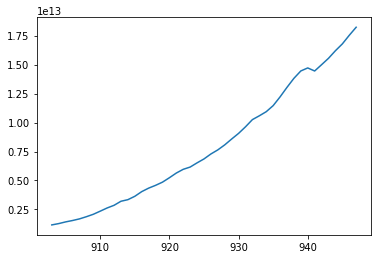

In [101]:
df[df['PrimaryKey'] == 'WDI-USA-NY.GDP.MKTP.CD']['Value'], df[df['PrimaryKey'] == 'WDI-USA-NY.GDP.MKTP.CD']['Value'].shift(+1), df[df['PrimaryKey'] == 'WDI-USA-NY.GDP.MKTP.CD']['Value'].plot()

<AxesSubplot:>

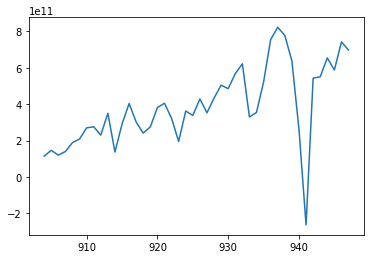

In [102]:
dif.plot()

In [7]:
df[df['PrimaryKey'] == 'WDI-USA-NY.GDP.MKTP.CD']

,GroupKey,PrimaryKey,RelationKey,RelationType,Date,Value,Dataset,InfoString,DerivedFlag
903,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-01-01,1.164850e+12,WDI,GDP (current US$),NaN
904,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-02-01,1.279110e+12,WDI,GDP (current US$),NaN
905,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-03-01,1.425376e+12,WDI,GDP (current US$),NaN
906,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-04-01,1.545243e+12,WDI,GDP (current US$),NaN
907,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-05-01,1.684904e+12,WDI,GDP (current US$),NaN
908,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-06-01,1.873412e+12,WDI,GDP (current US$),NaN
909,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-07-01,2.081826e+12,WDI,GDP (current US$),NaN
910,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-08-01,2.351599e+12,WDI,GDP (current US$),NaN
911,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-09-01,2.627334e+12,WDI,GDP (current US$),NaN
912,WDI-USA-NY.GDP.MKTP.CD,WDI-USA-NY.GDP.MKTP.CD,NaN,ROOT,2020-10-01,2.857307e+12,WDI,GDP (current US$),NaN


In [120]:
adfuller( df[df['PrimaryKey'] == 'WDI-PRT-NY.GDP.MKTP.CD']['Value'], autolag='AIC')

(0.08994703784942988,
 0.965367991351732,
 0,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 1584.8269899725774)

In [125]:
df[df['PrimaryKey'] == 'TEP-xmeas_37-1-USA']

,GroupKey,PrimaryKey,RelationKey,RelationType,Date,Value,Dataset,InfoString,DerivedFlag
1263,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-01-01,0.017866,TEP,NaN,0.0
1264,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-02-01,0.017866,TEP,NaN,0.0
1265,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-03-01,0.017866,TEP,NaN,0.0
1266,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-04-01,0.017866,TEP,NaN,0.0
1267,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-05-01,0.017866,TEP,NaN,0.0
1268,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-06-01,0.041320,TEP,NaN,0.0
1269,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-07-01,0.041320,TEP,NaN,0.0
1270,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-08-01,0.041320,TEP,NaN,0.0
1271,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-09-01,0.041320,TEP,NaN,0.0
1272,WDI-USA-NY.GDP.MKTP.CD,TEP-xmeas_37-1-USA,WDI-USA-NY.GDP.MKTP.CD,RELATED,2020-10-01,0.041320,TEP,NaN,0.0


In [124]:
df[df['PrimaryKey'] == 'TEP-xmeas_37-1-DEU']

,GroupKey,PrimaryKey,RelationKey,RelationType,Date,Value,Dataset,InfoString,DerivedFlag
3177,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-01-01,0.017866,TEP,NaN,0.0
3178,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-02-01,0.017866,TEP,NaN,0.0
3179,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-03-01,0.017866,TEP,NaN,0.0
3180,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-04-01,0.017866,TEP,NaN,0.0
3181,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-05-01,0.017866,TEP,NaN,0.0
3182,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-06-01,0.041320,TEP,NaN,0.0
3183,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-07-01,0.041320,TEP,NaN,0.0
3184,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-08-01,0.041320,TEP,NaN,0.0
3185,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-09-01,0.041320,TEP,NaN,0.0
3186,WDI-DEU-NY.GDP.MKTP.CD,TEP-xmeas_37-1-DEU,WDI-DEU-NY.GDP.MKTP.CD,RELATED,2020-10-01,0.041320,TEP,NaN,0.0
